# **<center> Введение в Python, New Economic School, MAE 2022 </center>**
## **<center> Занятие 4 и частично 5 </center>**

План:

* Построенние графиков (matplotlib & seaborn)
* Эконометрика в Python (statsmodels)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## **Графики**

<center> <img src="https://matplotlib.org/stable/_static/logo2_compressed.svg" width=50%> </center>

**matplotlib** - библиотека для визуализации данных (как 2D, так и 3D), позволяющая создавать изображения различной сложности и видов.

Перед тем, как рисовать различные графики, давайте подгрузим данные. На данном занятии мы будем рассматривать самые различные данные, чтобы графики были разнообразнее

In [2]:
df_gasoline = pd.read_csv('/content/PET_PRI_GND_DCUS_NUS_W.csv')

df_gasoline.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


**matplotlib** состоит из множества различных модулей, которые в свою очередь наполнены различными классами и функциями, которые связаны между собой.

Как правило, пользуются ограниченным числом модулей данной библиотеки, наиболее распространенным среди которых является **pyplot** - высокоуровневый и удобный в обращении интерфейс. С ним мы и будем иметь дело.

Главным элементом является рисунок - Figure. У рисунка есть своя структура с иерархическими связями. Так, у рисунка есть область рисования - Axes (на рисунке может быть несколько областей рисований), есть различные элементы рисунка - Aesthetics (легенда, подписи, текст и т.п.), и основа - Canvas.

Область рисования - часть изображения с пространством данных. Каждая область содержит какое-то количество осей (2 для 2D, 3 для 3D).

Axis, координатная ось определяет область изменения входных данных. На ось наносятся значения/деления ticks и подписи к ним.

Aesthetics отвечает за элементы рисунка - линии, легенда, цвета, текст и т.д.

Основой является рисунок - Figure. Для создания рисунка требуется выполнить метод `plt.figure()`. Создавая рисунок, мы как бы создаем холст, на который дальше будем наносить различные элементы. Чтобы результаты рисования отразились на экране, нужно написать команду `plt.show()` после добавления различных элементов к графику. Элементы на графике добавляются последовательно. 

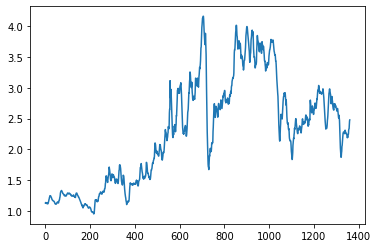

In [3]:
fig = plt.figure() # создаем объект Figure
plt.plot(df_gasoline['A1']) # наносим график на рисунок, передавая данные

plt.show() # отображаем график

Мы понимаем, что отображено по оси Y, однако по оси X хотелось бы видеть даты вместо индексов.

Давайте сперва преобразуем колонку с датой из строкового типа в тип `datetime.date`

In [4]:
df_gasoline['Date'].iloc[0], type(df_gasoline['Date'].iloc[0])

('01/02/1995', str)

Действительно переменная, отвечающая за дату, имеет строковый формат. Импортируем модуль `datetime` из библиотеки `datetime`

In [5]:
from datetime import datetime as dt

Преобразуем переменную и проверим её тип

In [6]:
df_gasoline['Date'] = df_gasoline['Date'].apply(lambda x: dt.strptime(x, '%m/%d/%Y').date())

In [7]:
df_gasoline['Date'].iloc[0], type(df_gasoline['Date'].iloc[0])

(datetime.date(1995, 1, 2), datetime.date)

Передадим первым аргументом ось X, вторым - ось Y. Также внутри `plt.figure(..)` можнозадать размер рисунка. Размер рисунка передается в виде кортежа из 2-х чисел - длины и ширины.

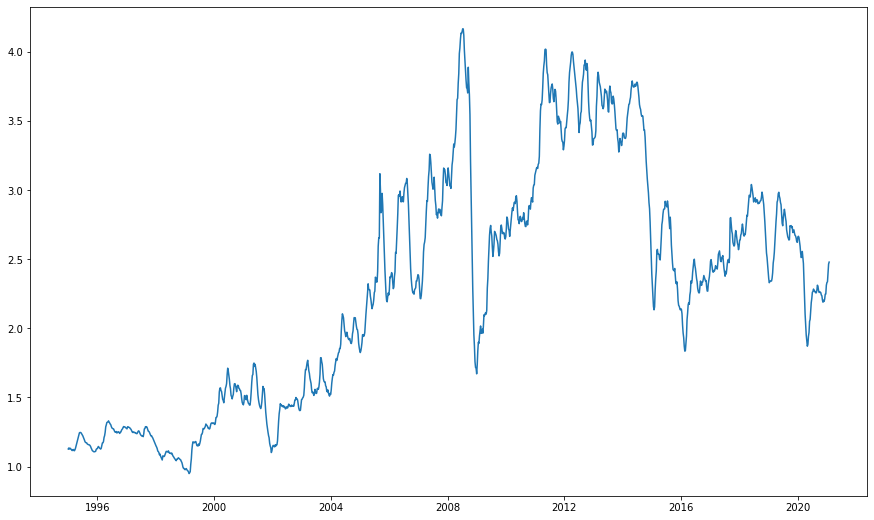

In [8]:
fig = plt.figure(figsize = (15, 9))
plt.plot(df_gasoline['Date'], df_gasoline['A1'])

plt.show()

Т.к. по дефолту если не задавать ось X (тогда переданные данные будут отображаться по оси Y), по оси X отображается индекс, то можно индексом таблицы сделать колонку с датами. 

In [9]:
df_gasoline.index = df_gasoline['Date']

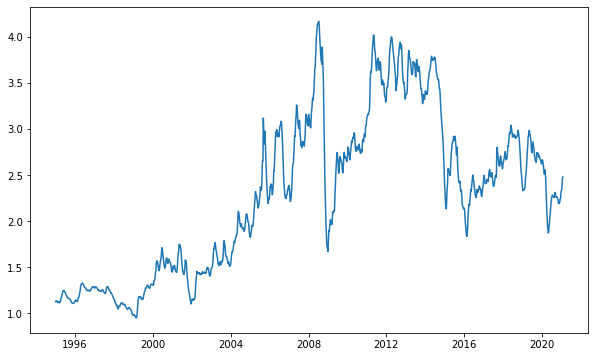

In [10]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'])

plt.show()

А если хотим добавить еще динамику других цен и отобразить на одном графике? Для этого на наш рисунок мы должны нанести еще графиков (на одну область рисования).

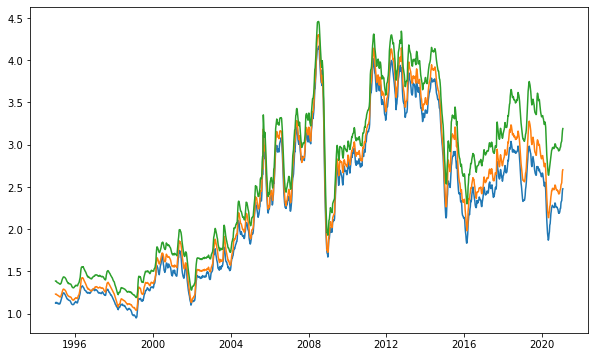

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'])
plt.plot(df_gasoline['A3'])
plt.plot(df_gasoline['P3'])
plt.show()

На данный момент, на одном рисунке у нас динамика нескольких типов цен на бензин. Проблемой здесь является понять, где какая цена. 

Для этого можно аннотировать рисунок путем нанесения на него нового элемента - легенды методом `plt.legend(..)`. Чтобы легенда была не пустой (и не приходилось выставлять лейблы внутри `plt.legend(..)`), нужно добавить `label` как аргумент.

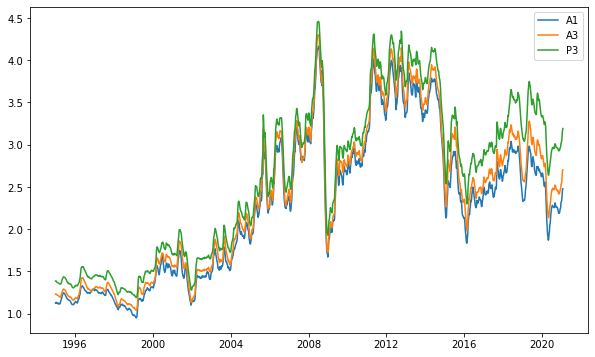

In [11]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1')
plt.plot(df_gasoline['A3'], label = 'A3')
plt.plot(df_gasoline['P3'], label = 'P3')
plt.legend()
plt.show()

У легенды можно добавлять название и менять названия лейблов, как в примере ниже 

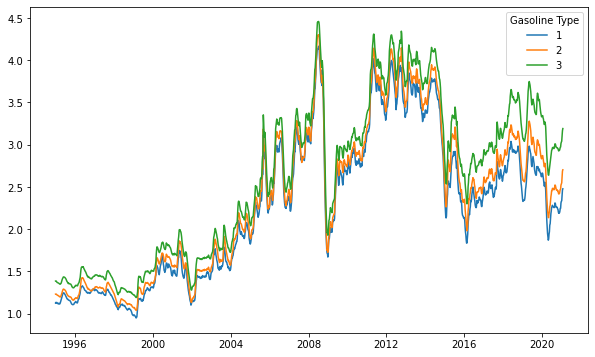

In [12]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1')
plt.plot(df_gasoline['A3'], label = 'A3')
plt.plot(df_gasoline['P3'], label = 'P3')
plt.legend(title = 'Gasoline Type', labels = ['1', '2', '3'])
plt.show()

Также можно специфицировать цвета графиков на рисунке с помощью аргумента `color`

Список именованных цветов можно посмотреть [здесь](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

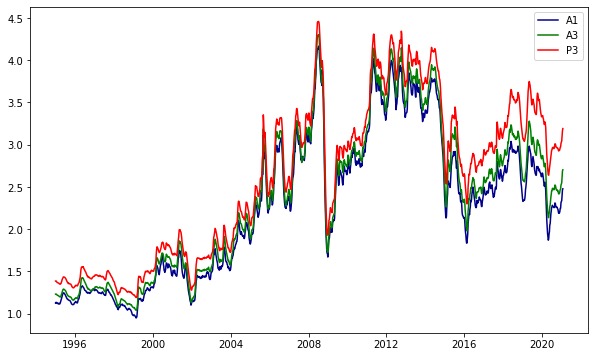

In [13]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.legend()
plt.show()

Также можно менять стиль линии (на пунктирный, точечный и т.д.) с помощью аргумента `linestyle`

Виды можно посмотреть [здесь](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

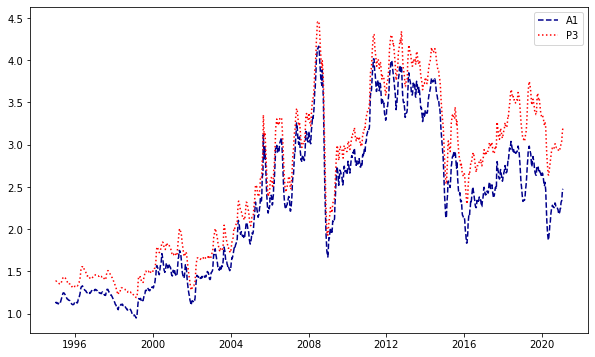

In [14]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', linestyle = 'dashed', color = 'darkblue')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red', linestyle = 'dotted')
plt.legend()
plt.show()

Также можно добавлять маркеры, задав аргумент `marker`. 

Виды маркеров можно посмотреть [здесь](https://matplotlib.org/stable/api/markers_api.html)

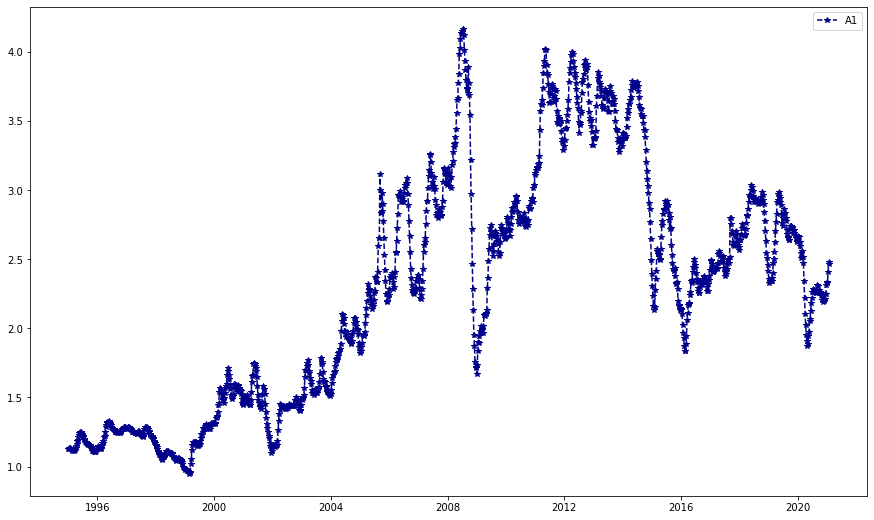

In [ ]:
fig = plt.figure(figsize = (15, 9))
plt.plot(df_gasoline['A1'], label = 'A1', linestyle = 'dashed', color = 'darkblue', marker = '*')
plt.legend()
plt.show()

Также можно менять параметры маркера, такие как его цвет и размер. Пример ниже:

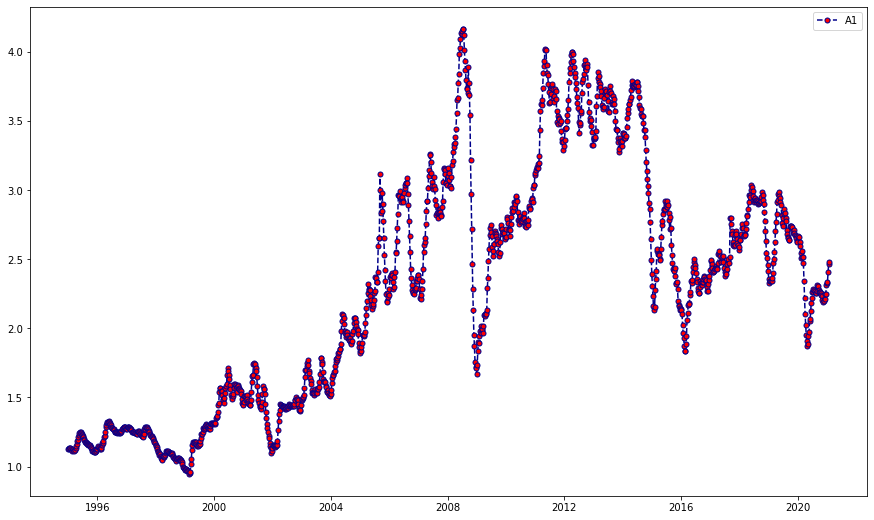

In [ ]:
fig = plt.figure(figsize = (15, 9))
plt.plot(df_gasoline['A1'], label = 'A1', linestyle = 'dashed', color = 'darkblue', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.legend()
plt.show()

А можно менять и параметры линии, увеличив например ее толщину задав параметр `linewidth`

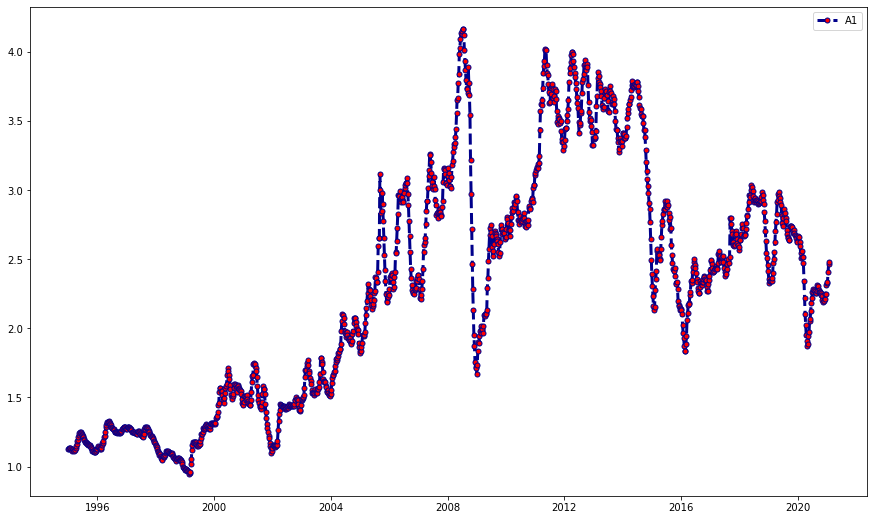

In [ ]:
fig = plt.figure(figsize = (15, 9))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue', linestyle = 'dashed', linewidth = 3, marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.legend()
plt.show()

Также на рисунок можно нанести названия осей и название рисунка с помощью `plt.xlabel(..)`, `plt.ylabel(..)`, `plt.title(..)`

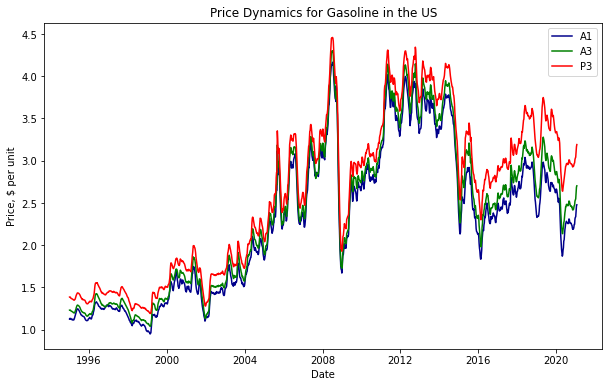

In [15]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price, $ per unit')
plt.title('Price Dynamics for Gasoline in the US')
plt.legend()
plt.show()

Можно и указать размер названий осей и названия графика, а также размер названий в легенде с помощью аргумента `fontsize`

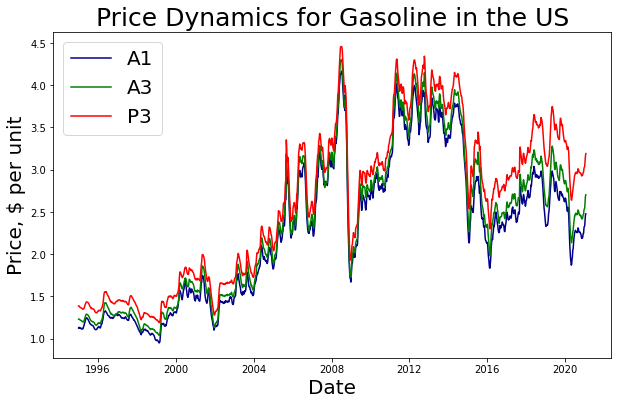

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.legend(fontsize = 20)
plt.show()

Однако единицы измерения по осям все еще мелкие, давайте также поменяем размер их шрифта, пользуясь методами `plt.xticks(..)`, `plt.yticks(..)`

Помимо шрифта можно указать наклон подписей оси через аргумент `rotation`

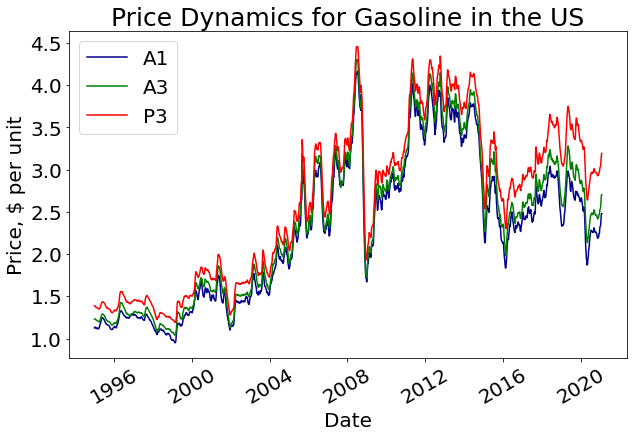

In [16]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 30)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

Если для двух осей изменения одинаковы, то можно сделать проще через одну строку с помощью `plt.tick_params(..)`. В таком случае изменения будут внесены для обоих осей. Какие-то отличные для двух осей изменения нужно будет подавать отдельно.

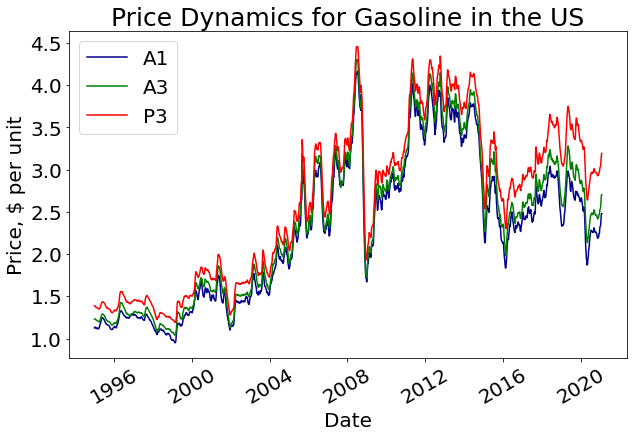

In [17]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.xticks(rotation = 30)
plt.legend(fontsize = 20)
plt.show()

Наконец, к графику можно добавить вспомогательные линии сетки `plt.grid(..)`. 

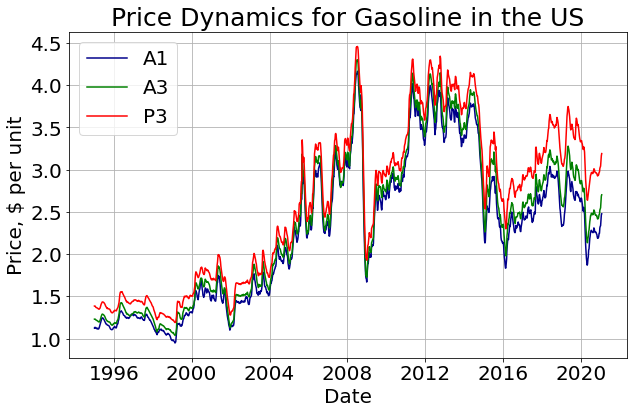

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.legend(fontsize = 20)
plt.grid()
plt.show()

В `plt.grid(axis = 'y')` можно специфицировать ось для нансения сетки.

Также с помощью метода `.set_major_locator()`, в который подается `mpl.dates.MonthLocator(interval = n)` примененного к `fix.axes[0].xaxis` можно сделать деления оси X более частыми - но нужно помнить о размере шрифта и наклоне отметок по оси X, чтобы все поместилось.

In [30]:
import matplotlib as mpl

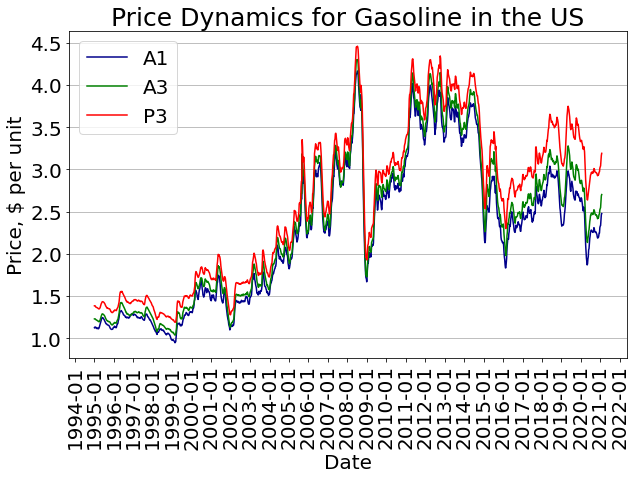

In [38]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.legend(fontsize = 20)
plt.grid(axis = 'y')
fig.axes[0].xaxis.set_major_locator(mpl.dates.MonthLocator(interval = 12))
plt.xticks(rotation = 90)
plt.show()



Можем добавить вертикальную или горизонтальную линию на координату с помощью методов `plt.axhline(x, y, ...)`, `plt.axvline(x, y, ...)`

In [40]:
x1 = dt(2008, 1, 1)
x2 = dt(2008, 12, 31)

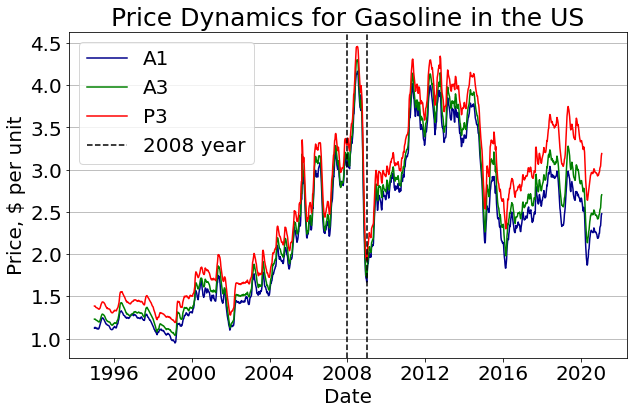

In [41]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.grid(axis = 'y')
plt.axvline(x1, color = 'black', linestyle = 'dashed', label = '2008 year')
plt.axvline(x2, color = 'black', linestyle = 'dashed')
plt.legend(fontsize = 20)
plt.show()

Также можно нанести текст/надписи на график с помощью `plt.text(x, y, 'text', ...)`

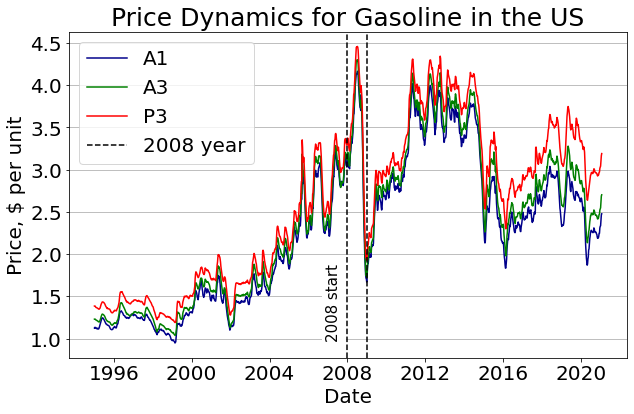

In [42]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.grid(axis = 'y')
plt.axvline(x1, color = 'black', linestyle = 'dashed', label = '2008 year')
plt.axvline(x2, color = 'black', linestyle = 'dashed')
plt.text(dt(2006, 12, 1), 1.0, '2008 start', fontsize = 15, rotation = 90, bbox = dict(color = 'white'), color = 'black')
plt.legend(fontsize = 20)
plt.show()

Также с помощью `plt.axvspan(x1, x2, ...)` можно заполнить пространство между двумя вертикальными линиями (`plt.axhspan(y1, y2,..)` для заполнения пространства между двумя горизонтальными линиями) и подобрать цвет (прям как на рисунках по макро)

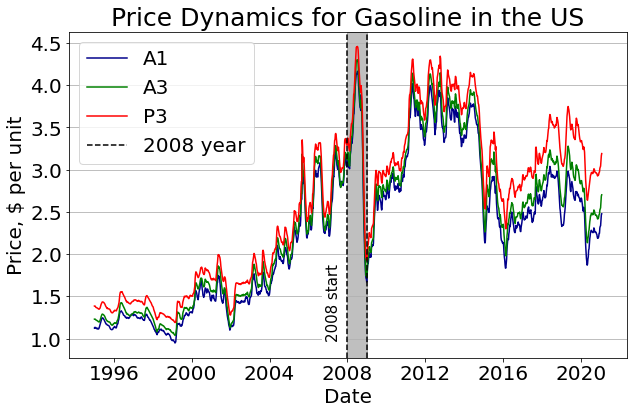

In [44]:
fig = plt.figure(figsize = (10, 6))
plt.plot(df_gasoline['A1'], label = 'A1', color = 'darkblue')
plt.plot(df_gasoline['A3'], label = 'A3', color = 'green')
plt.plot(df_gasoline['P3'], label = 'P3', color = 'red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Price, $ per unit', fontsize = 20)
plt.title('Price Dynamics for Gasoline in the US', fontsize = 25)
plt.tick_params(labelsize = 20)
plt.grid(axis = 'y')
plt.axvline(x1, color = 'black', linestyle = 'dashed', label = '2008 year')
plt.axvline(x2, color = 'black', linestyle = 'dashed')
plt.text(dt(2006, 12, 1), 1.0, '2008 start', fontsize = 15, rotation = 90, bbox = dict(color = 'white'), color = 'black')
plt.legend(fontsize = 20)
plt.axvspan(x1, x2, alpha = 0.5, color = 'grey')
plt.savefig('filename.pdf')
plt.show()


Но можно рисовать и не только "линейные" графики. Можем рисовать гистограммы, диаграммы рассеивания (scatterplot), графики ящика с усами - boxplot, "свечные" графики

Для этого давайте перейдем к другому набору данных - данным по предложениям на *AirBnb*

In [45]:
df_airbnb = pd.read_csv('/content/AB_NYC_2019.csv')

df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


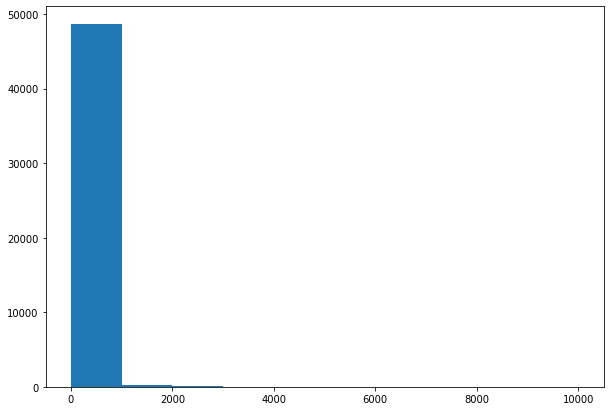

In [46]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb['price'])
plt.show()

К сожалению, графиквыше мало о чем нам говорит из-за наличия выбросов. Давайте с помощью аргумента `range` в `plt.hist(..)` зададим границы.

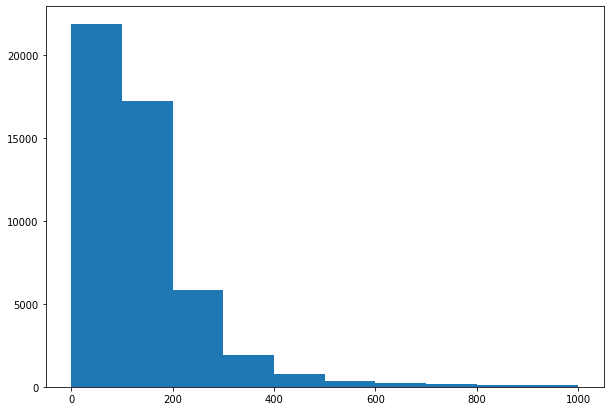

In [47]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb['price'], range = [0, 1000])
plt.show()

График выше уже более читабельный!

Также мы можем задавать число бинов аргументом `bins`

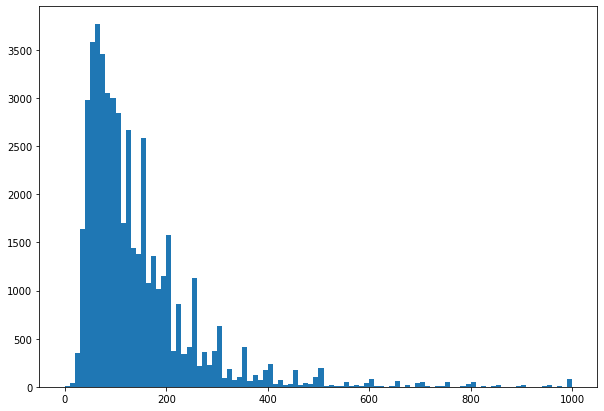

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb['price'], range = [0, 1000], bins = 100)
plt.show()

А можем вместо подсчета наблюдений в бине считать частоту с помощью аргумента `density` (см. ось Y на графике выше и ниже)

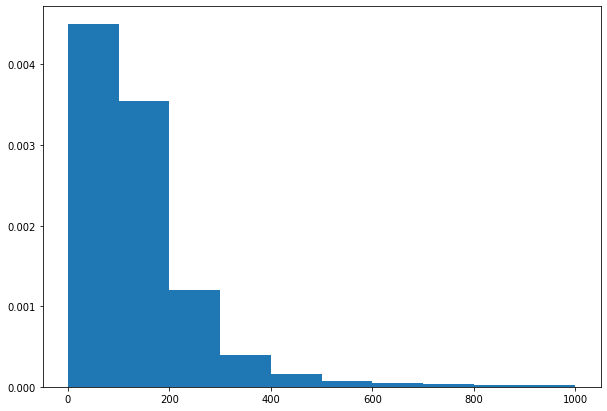

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb['price'], range = [0, 1000], density = True)
plt.show()

Можно также смотреть на кумулятивную эмпирическую функцию распределения с помощью аргумента `cumulative`

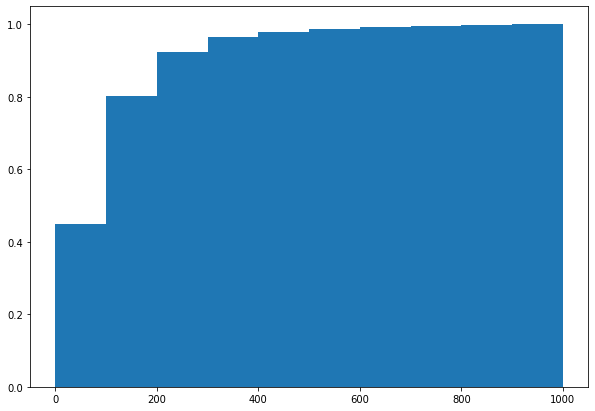

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb['price'], range = [0, 1000], density = True, cumulative = True)
plt.show()

In [ ]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


При нанесении нескольких гистограмм (сравнение между какими-то группами) на 1 график, они могут пересекатсья/наслаиваться так, что не видно какой-то из них. Для этого можно добавить степень прозрачности каждого графика с помощью аргумента `alpha`

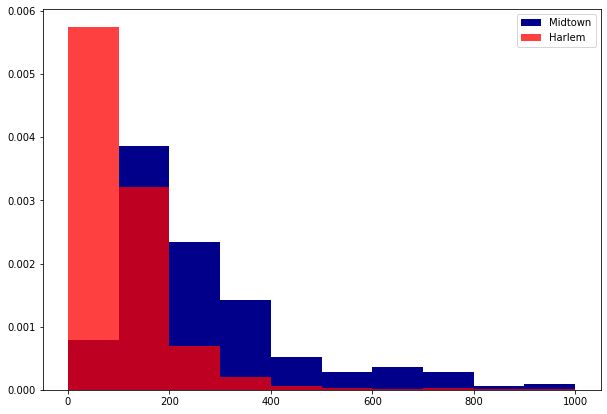

In [48]:
fig = plt.figure(figsize = (10, 7))
plt.hist(df_airbnb[df_airbnb['neighbourhood'] == 'Midtown']['price'], range = [0, 1000], density = True, 
         alpha = 1, color = 'darkblue', label = 'Midtown')
plt.hist(df_airbnb[df_airbnb['neighbourhood'] == 'Harlem']['price'], range = [0, 1000], density = True, 
         alpha = 0.75, color = 'red', label = 'Harlem')
plt.legend()
plt.show()

Теперь давайте создадим barplot

Давайте для этого сначала посчитаем среднюю цену аренды по каждому типу апартаментов

In [49]:
price_by_types = df_airbnb.groupby('room_type')['price'].mean()

In [50]:
price_by_types

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

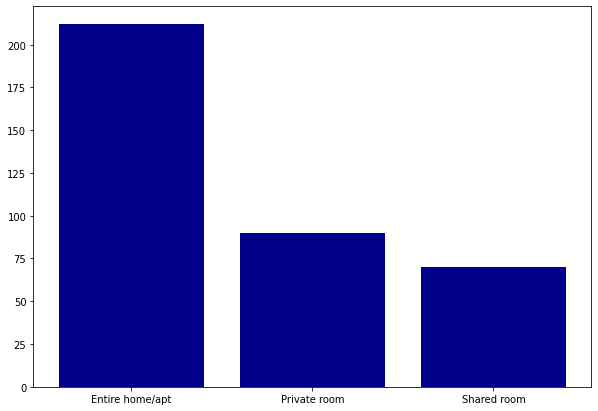

In [51]:
fig = plt.figure(figsize = (10, 7))
plt.bar(price_by_types.index, price_by_types, color = 'darkblue')
plt.show()

Можно построить и диаграмму рассеивания - scatterplot

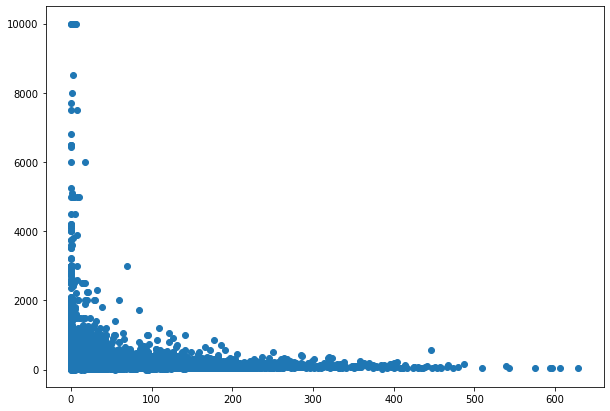

In [52]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(x = df_airbnb['number_of_reviews'], y = df_airbnb['price'])
plt.show()

Также можно построить errorbar, у которого на каждой точке будет интервал, для которого надо специфицировать ошибки по X или Y - `yerr`, `xerr`

In [129]:
tmp_data_mean = df_airbnb.groupby('neighbourhood_group')['price'].agg({'mean', 'std'}).reset_index().rename(columns = {'mean': 'mean_price',
                                                                                                                       'std': 'std_price'})

x = tmp_data_mean['neighbourhood_group']
y = tmp_data_mean['mean_price']

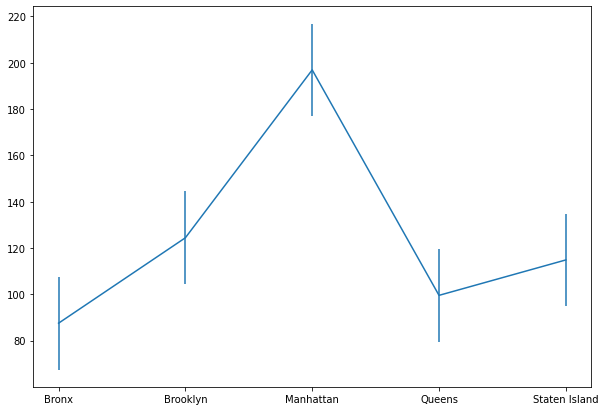

In [130]:
fig = plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = 20)
plt.show()

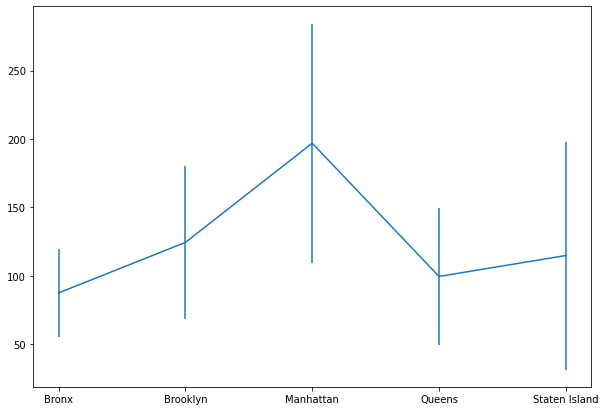

In [132]:
yerr = tmp_data_mean['std_price'] * 0.3

fig = plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = yerr)
plt.show()

Также можно строить более специализированные графики. Удобнее всего строить их с помощью библиотеки **seaborn**, которая построена на библиотеке **matplotlib**

In [56]:
import seaborn as sns

Например можно сделать диаграмму рассеивания, указав группы через параметр `hue`

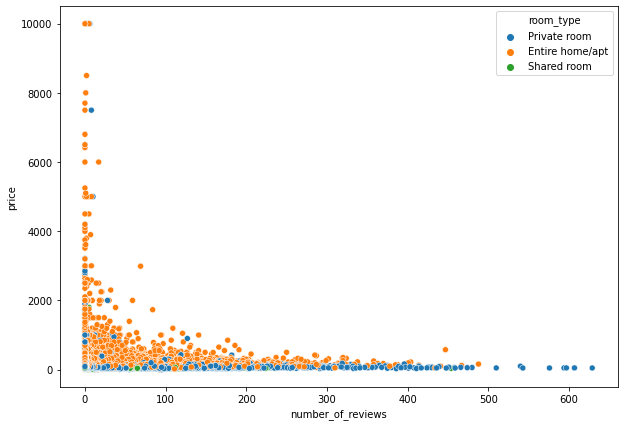

In [57]:
fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x = df_airbnb['number_of_reviews'], y = df_airbnb['price'], hue = df_airbnb['room_type'])
plt.show()

Также errorplot можно создать таким образом

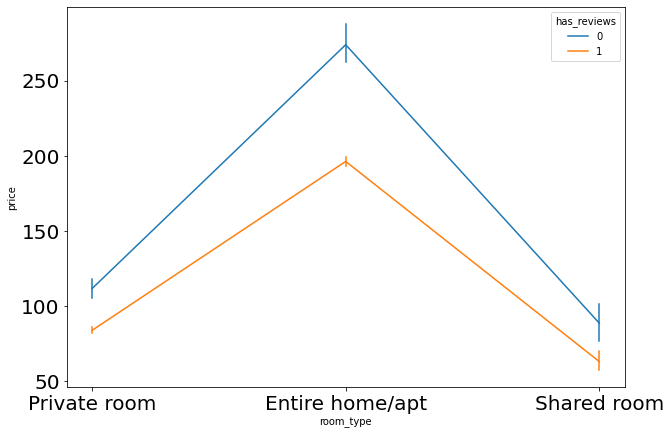

In [135]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data = df_airbnb, x = "room_type", y = "price", hue = "has_reviews", err_style = "bars", ci = 95)
plt.tick_params(labelsize = 20)
plt.show()

Либо так

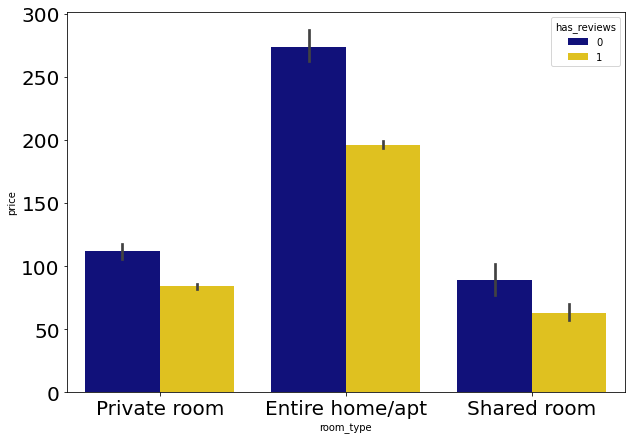

In [138]:
fig = plt.figure(figsize = (10, 7))
sns.barplot(data = df_airbnb, x = "room_type", y = "price", hue = "has_reviews", ci = 95, palette = ['darkblue', 'gold'])
plt.tick_params(labelsize = 20)
plt.show()

Можно построить гистограмму с графиком плотности через `sns.distplot`, где `kde` отвечает за построение графика плотности, а `hist` - за построение гистограммы.

`color` по дефолту отвечает за цвет графика плотности. Для задания параметров гитсогграммы их можно передать через `hist_kws = {'param_name': value, ...}`

Отобразим только график плотности

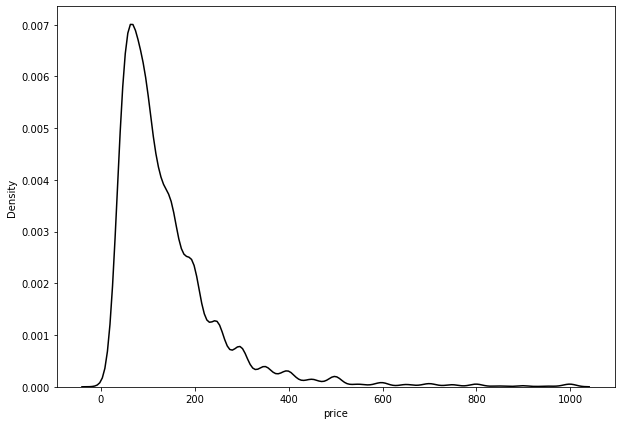

In [58]:
fig = plt.figure(figsize = (10, 7))
sns.distplot(df_airbnb[df_airbnb['price'] <= 1000]['price'], bins = 20, color = 'black', kde = True, hist = False, hist_kws = {'color': 'darkblue', 'alpha': 0.75})
plt.show()

Отобразим оба графика на 1-м рисунке

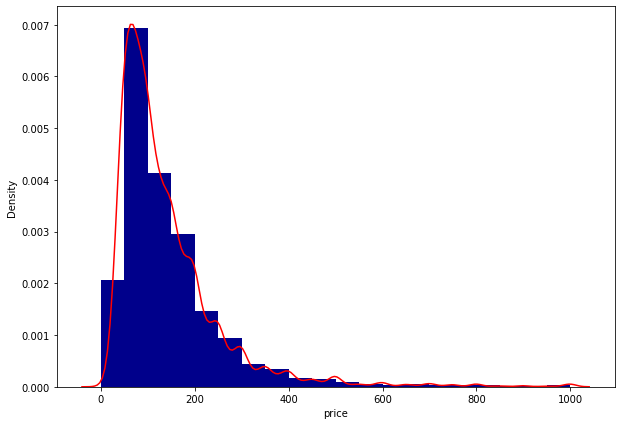

In [59]:
fig = plt.figure(figsize = (10, 7))
sns.distplot(df_airbnb[df_airbnb['price'] <= 1000]['price'], bins = 20, color = 'red', kde = True, hist = True, hist_kws = {'color': 'darkblue', 'alpha': 1})
plt.show()

In [60]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Есть также график countplot `sns.countplot(..)`, позволяющий посчитать число наблюдений по уникальным значениям переменной.

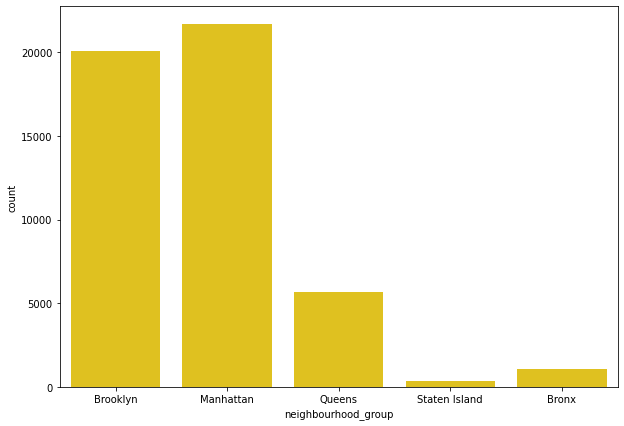

In [61]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(df_airbnb['neighbourhood_group'], color = 'gold')
plt.show()

In [62]:
df_airbnb['neighbourhood_group'].value_counts().index

Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

К сожалению, нельзя по дефолту упорядочить по частоте встречаемости, поэтьому в аргумент `order` (как вариант решения проблемы) можно подать индексы в нужном порядке. Нужный порядок можно взять через `.value_counts().index`, примененный к вашей переменной.

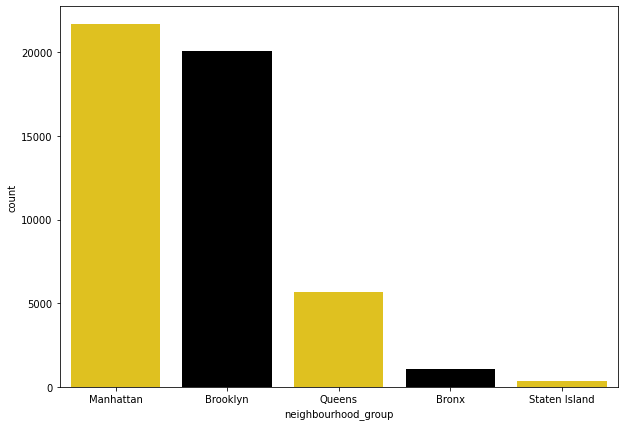

In [63]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(df_airbnb['neighbourhood_group'], palette = ['gold', 'black'], 
              order = df_airbnb['neighbourhood_group'].value_counts().index)
plt.show()

Создадим дамми-переменную **has_reviews**, равную 0 в случае отсутствия отзывов и 1 в обратном случае.

In [64]:
df_airbnb['has_reviews'] = np.where(df_airbnb['number_of_reviews'] == 0, 0, 1)

Построим countplot в разбивке по наличию отзывов. 

Также поиграемся с легендой - дадим названия и переименуем лейблы


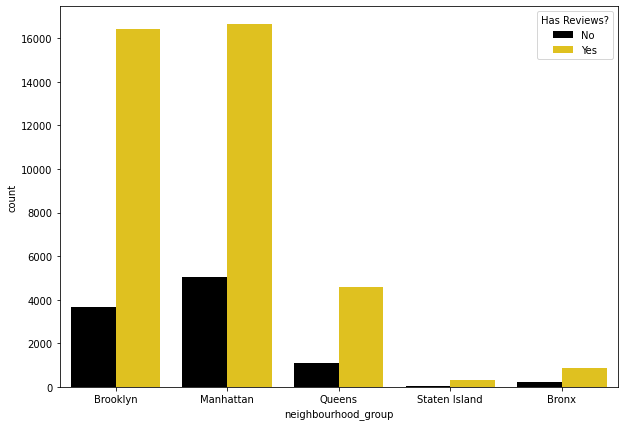

In [65]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(df_airbnb['neighbourhood_group'], hue = df_airbnb['has_reviews'], palette = ['black', 'gold'])
plt.legend(labels = ['No', 'Yes'], title = 'Has Reviews?')
plt.show()

Еще одним из интересных графиков является график "ящика с усами", он же boxplot. Пояснение к построению графика снизу на картинке.

<center> <img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width=75%> </center>




Давайте построим такой график, где будем смотреть распределение числа отзывов по разным районам.

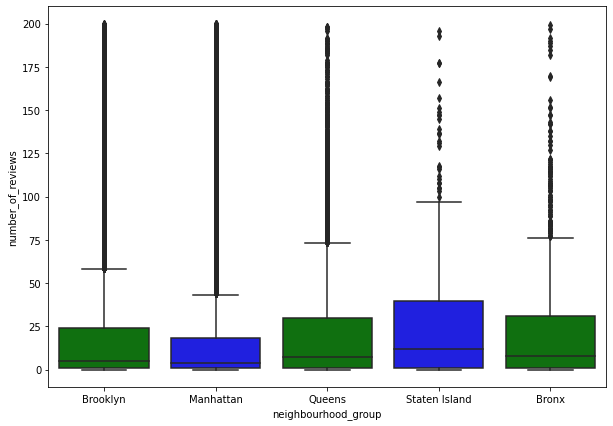

In [ ]:
fig = plt.figure(figsize = (10, 7))
sns.boxplot(x = df_airbnb[df_airbnb['number_of_reviews'] <= 200]['neighbourhood_group'], y = df_airbnb[df_airbnb['number_of_reviews'] <= 200]['number_of_reviews'], palette = ['green', 'blue'])
plt.show()

Также отрисуем свечной график, пояснения к которому даны на картинке

<center> <img src="https://miro.medium.com/max/1365/1*TTMOaNG1o4PgQd-e8LurMg.png" width=75%> </center>

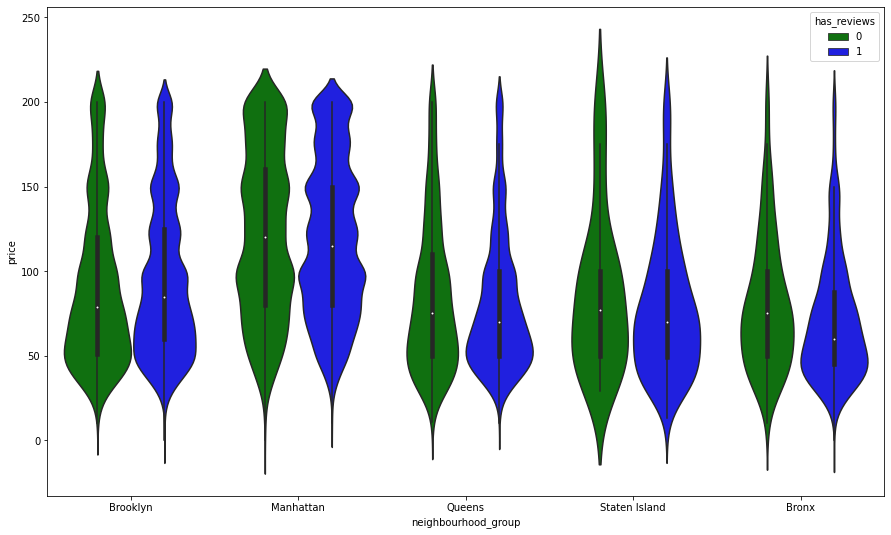

In [66]:
fig = plt.figure(figsize = (15, 9))
sns.violinplot(x = df_airbnb[df_airbnb['price'] <= 200]['neighbourhood_group'], y = df_airbnb[df_airbnb['price'] <= 200]['price'], 
               hue = df_airbnb[df_airbnb['price'] <= 200]['has_reviews'], palette = ['green', 'blue'], )
plt.show()

С помощью аргумента `split` можно отобразить два распределения цены (по has_reviews) для района на одной "свечке"

Также можно задать, что хотим видеть внутри свечки с помощью аргумента `inner` (укажем, что ничего - `None`)

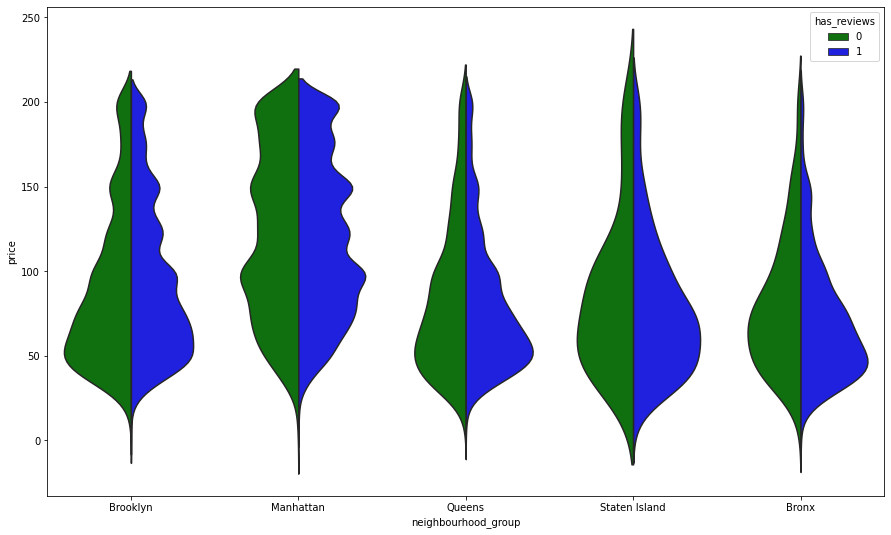

In [67]:
fig = plt.figure(figsize = (15, 9))
sns.violinplot(x = df_airbnb[df_airbnb['price'] <= 200]['neighbourhood_group'], y = df_airbnb[df_airbnb['price'] <= 200]['price'], 
               hue = df_airbnb[df_airbnb['price'] <= 200]['has_reviews'], palette = ['green', 'blue'], split = True, inner = None)
plt.show()

Также можно создать и графики "тепловой карты" с помощью `sns.heatmap`

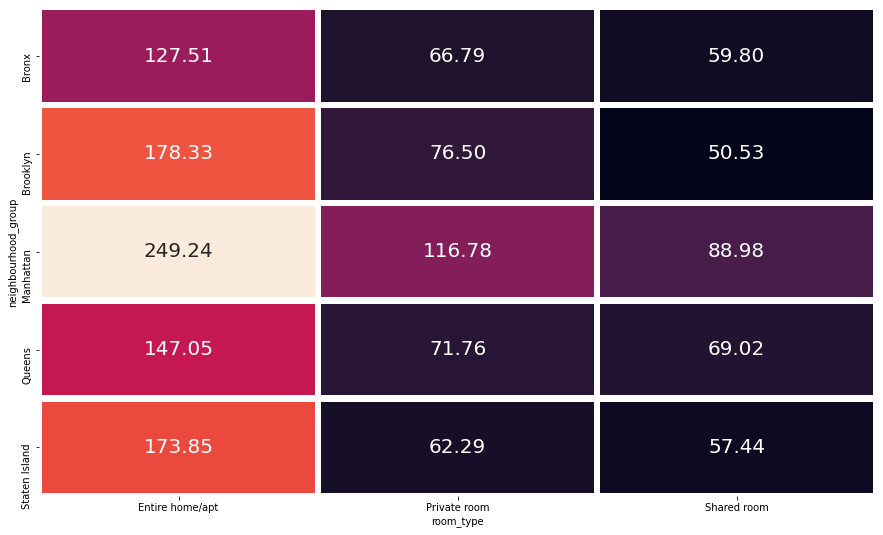

In [ ]:
heatmap_data = df_airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index().pivot("neighbourhood_group", 
                                                                                                      "room_type", "price")
fig = plt.figure(figsize = (15, 9))
sns.heatmap(heatmap_data, annot = True,  linewidths = 5.5, cbar = False, fmt = '.2f', annot_kws = {'fontsize': 20})
plt.show()

In [ ]:
heatmap_data

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Пример heatmap для матрицы корреляций. Параметр `cbar` отвечает за наличие тепловой шкалы справа, `annot` - позволяет наносить значения в поля, `fmt` специфицирует до скольки знаков округлять значения, `linewidths` отвечает за расстояние между блоками

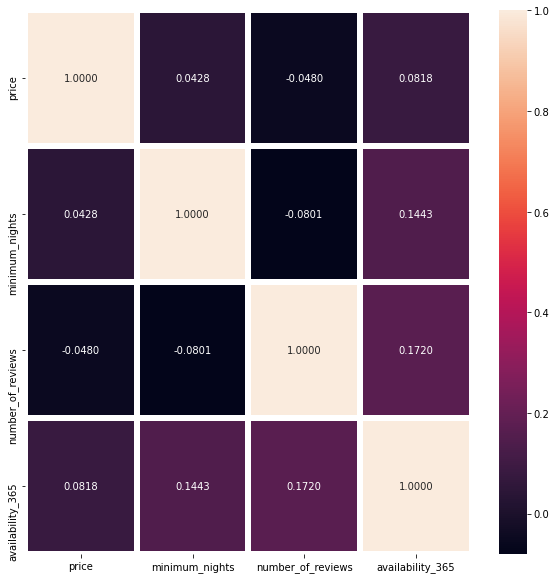

In [68]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df_airbnb[['price', 'minimum_nights',	'number_of_reviews', 'availability_365']].corr(), annot = True, fmt = '.4f', linewidths = 5)

plt.show()

In [69]:
df_gasoline.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
Date,,,,,,,,,,,,,,
1995-01-02,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1995-01-09,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
1995-01-16,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
1995-01-23,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
1995-01-30,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [70]:
df_gasoline['D1'] = df_gasoline['D1'] / 100

Бывает так, что на одном рисунке мы хотим построить несколько графиков, но размерность у них разная - допустим, ВВП и ключевую ставку. Однако если расположить оба графика так, что у них будет одна ось Y, то график со ставкой будет лежать в районе 0, в то время как динамику по ВВП мы сможем наблюдать нормально. А хотелось бы наблюдать нормально все.

Для этого можно создать график с двумя осями. Для этого создадим рисунок (fig) и его области (ax) через `plt.subplots(nrows = n, ncols = k, figsize = (x, y))`

Где `nrows` и `ncols` это число областей для отрисовки (число подграфиков) по строчкам и столбцам. `figsize` задается для общего графика.

На `ax` рисуем график. Далее берем и создаем новую ось с помощью `ax.twinx()` и рисуем на ней нужный график.

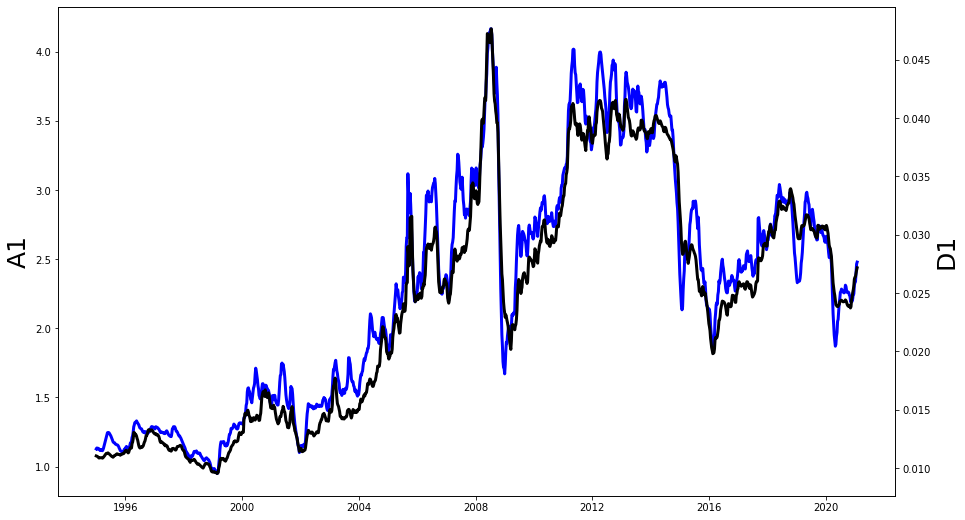

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 9))

ax.plot(df_gasoline['A1'], color = 'blue', linewidth = 3)
ax.set_ylabel('A1', fontsize = 25)

ax_new = ax.twinx()

ax_new.plot(df_gasoline['D1'], color = 'black', linewidth = 3)
ax_new.set_ylabel('D1', fontsize = 25)

plt.show()

In [71]:
df_shop = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

df_shop.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Часто возникает потребность в создании рисунка с несколькими подграфиками. Давайте создадим несколько таких.

Ниже создадим рисунок с двумя подграфиками по столбцам.

С помощью `plt.suptitle(..)` можно добавить название всему рисунку. В случае подграфиков давать название им, а также названия осям можно с помощью `ax[..].set_title(..)`, `ax[..].set_xlabel(..)`, `ax[..].set_ylabel`.

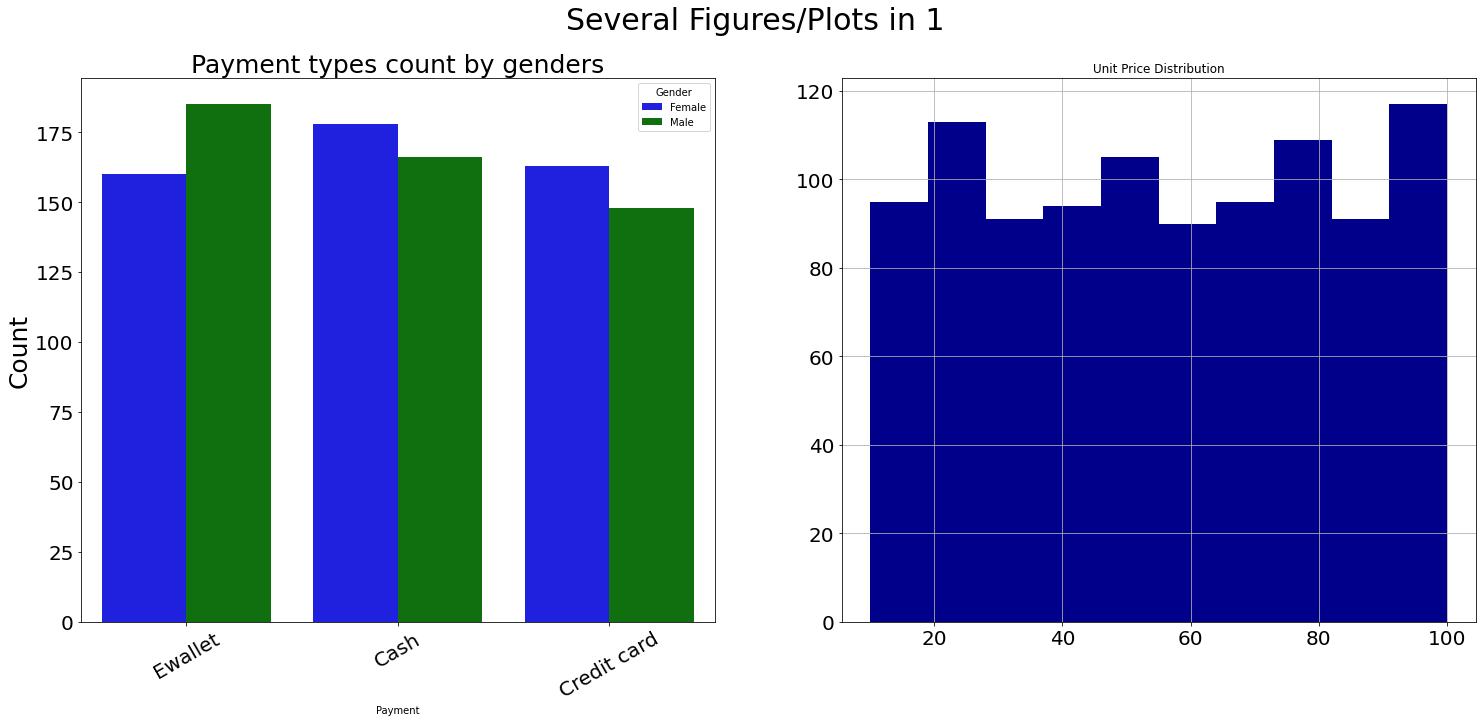

In [73]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))

plt.suptitle('Several Figures/Plots in 1', fontsize = 30)

sns.countplot(df_shop['Payment'], hue = df_shop['Gender'], palette = ['blue', 'green'], ax = ax[0])
ax[0].set_title('Payment types count by genders', fontsize = 25)
ax[0].tick_params(labelsize = 20)
ax[0].xaxis.set_tick_params(rotation = 30)
ax[0].legend(title = 'Gender')
ax[0].set_ylabel('Count', fontsize = 25)

ax[1].hist(df_shop['Unit price'], color = 'darkblue')
ax[1].tick_params(labelsize = 20)
ax[1].set_title('Unit Price Distribution')
ax[1].grid()

plt.show()

Можно также создать рисунок из подграфиков по строкам и столбцам. Тогда нужно индексироваться у `ax` по нескольким координатам (строка-столбец)

Специально ничего не отрисуем на последнем подграфике.

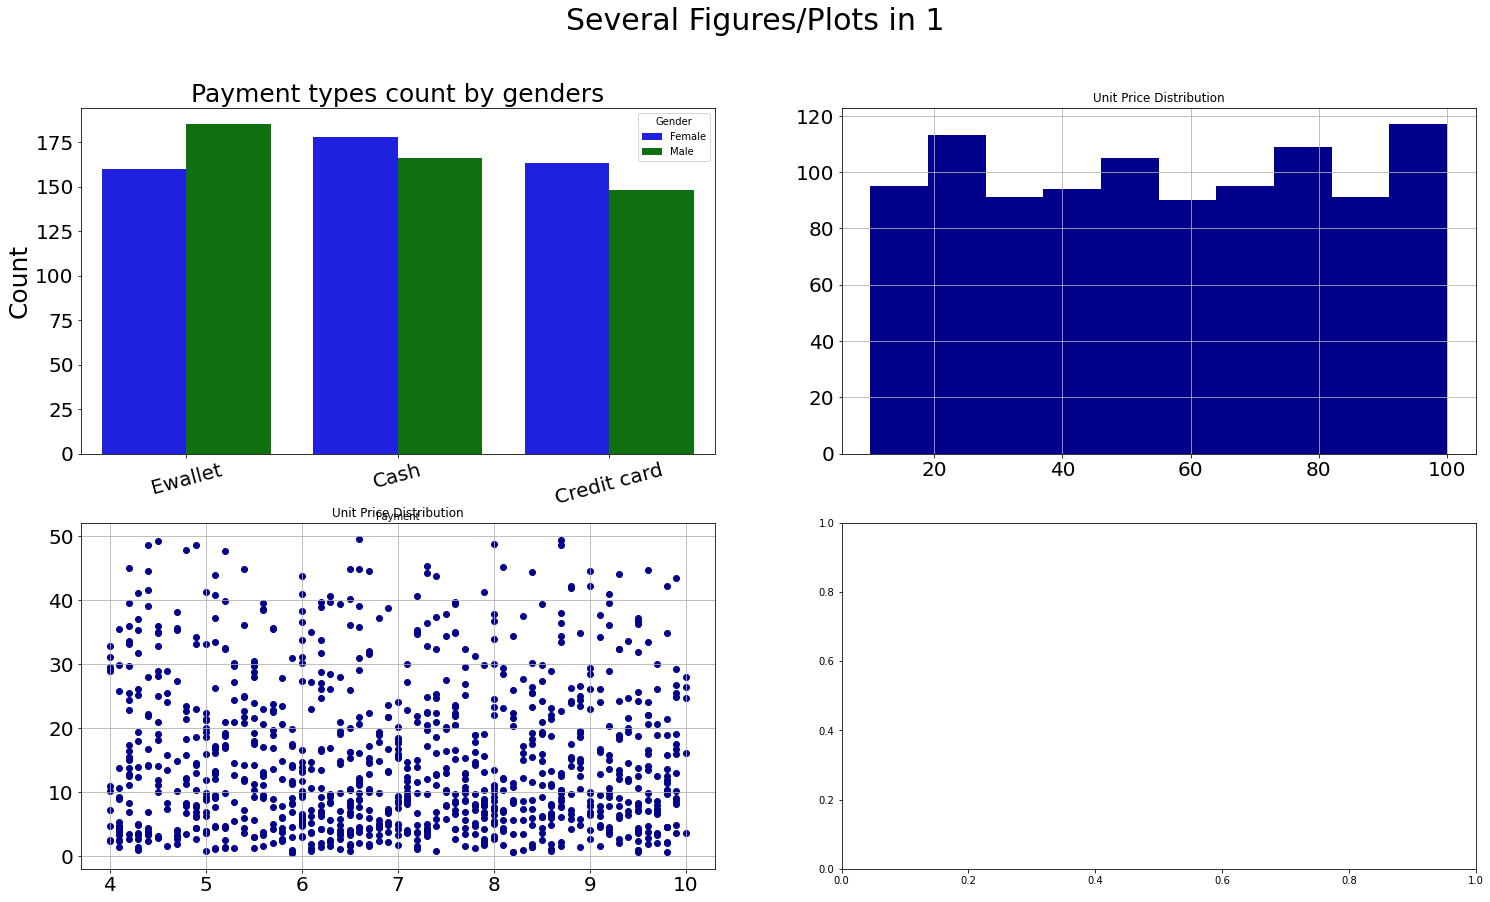

In [74]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 14))

plt.suptitle('Several Figures/Plots in 1', fontsize = 30)

sns.countplot(df_shop['Payment'], hue = df_shop['Gender'], palette = ['blue', 'green'], ax = ax[0, 0])
ax[0, 0].set_title('Payment types count by genders', fontsize = 25)
ax[0, 0].tick_params(labelsize = 20)
ax[0, 0].xaxis.set_tick_params(rotation = 15)
ax[0, 0].set_ylabel('Count', fontsize = 25)

ax[0, 1].hist(df_shop['Unit price'], color = 'darkblue')
ax[0, 1].tick_params(labelsize = 20)
ax[0, 1].set_title('Unit Price Distribution')
ax[0, 1].grid()

ax[1, 0].scatter(x = df_shop['Rating'], y = df_shop['gross income'], color = 'darkblue')
ax[1, 0].tick_params(labelsize = 20)
ax[1, 0].set_title('Unit Price Distribution')
ax[1, 0].grid()

plt.show()

Можно удалить оставшийся лишний график обратившись ко всему рисунку методом `delaxes(..)`, указав в нем область нужного подграфика.

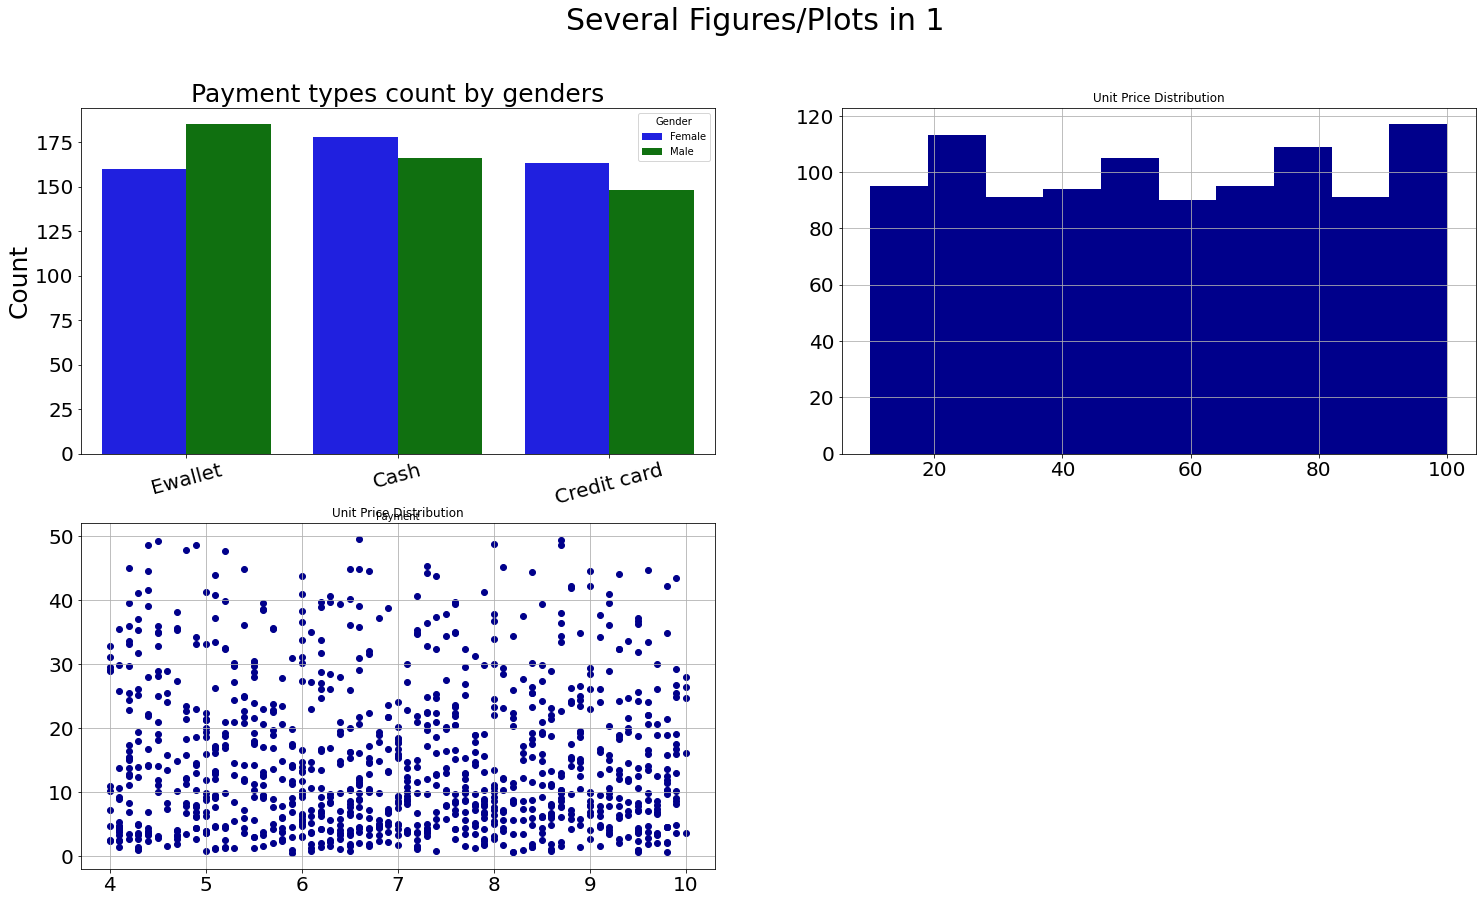

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 14))

plt.suptitle('Several Figures/Plots in 1', fontsize = 30)

sns.countplot(df_shop['Payment'], hue = df_shop['Gender'], palette = ['blue', 'green'], ax = ax[0, 0])
ax[0, 0].set_title('Payment types count by genders', fontsize = 25)
ax[0, 0].tick_params(labelsize = 20)
ax[0, 0].xaxis.set_tick_params(rotation = 15)
ax[0, 0].set_ylabel('Count', fontsize = 25)

ax[0, 1].hist(df_shop['Unit price'], color = 'darkblue')
ax[0, 1].tick_params(labelsize = 20)
ax[0, 1].set_title('Unit Price Distribution')
ax[0, 1].grid()

ax[1, 0].scatter(x = df_shop['Rating'], y = df_shop['gross income'], color = 'darkblue')
ax[1, 0].tick_params(labelsize = 20)
ax[1, 0].set_title('Unit Price Distribution')
ax[1, 0].grid()

fig.delaxes(ax[1, 1])

plt.show()

Также все это дело можно сохранить с помощью метода `plt.savefig(..)`, указав в нем путь и имя вашего рисунка с нужным Вам расширением (pdf, png, jpg, eps, ...)

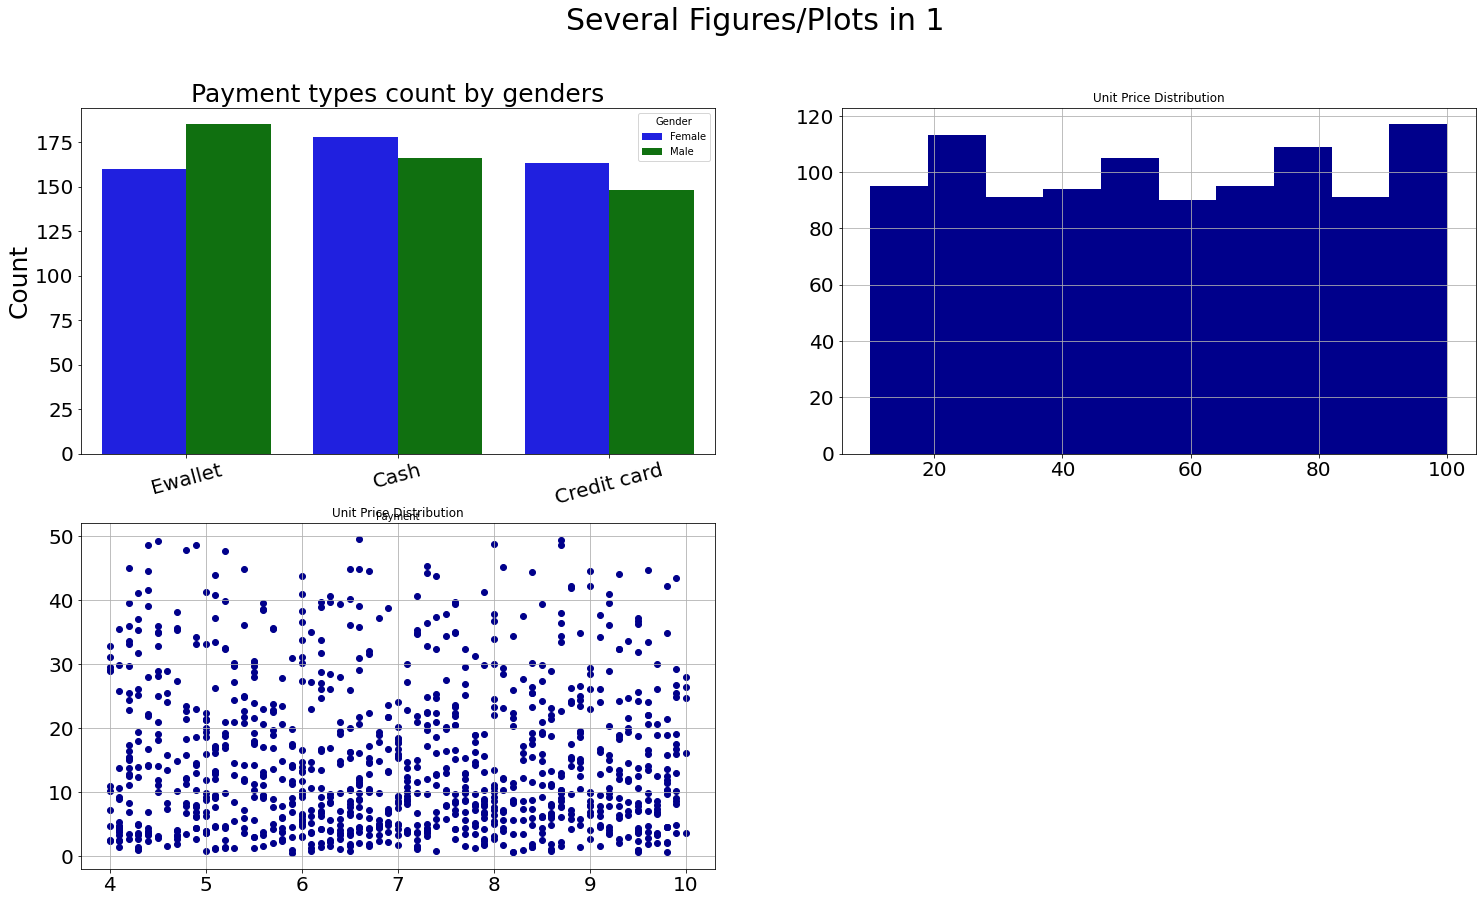

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 14))

plt.suptitle('Several Figures/Plots in 1', fontsize = 30)

sns.countplot(df_shop['Payment'], hue = df_shop['Gender'], palette = ['blue', 'green'], ax = ax[0, 0])
ax[0, 0].set_title('Payment types count by genders', fontsize = 25)
ax[0, 0].tick_params(labelsize = 20)
ax[0, 0].xaxis.set_tick_params(rotation = 15)
ax[0, 0].set_ylabel('Count', fontsize = 25)

ax[0, 1].hist(df_shop['Unit price'], color = 'darkblue')
ax[0, 1].tick_params(labelsize = 20)
ax[0, 1].set_title('Unit Price Distribution')
ax[0, 1].grid()

ax[1, 0].scatter(x = df_shop['Rating'], y = df_shop['gross income'], color = 'darkblue')
ax[1, 0].tick_params(labelsize = 20)
ax[1, 0].set_title('Unit Price Distribution')
ax[1, 0].grid()

fig.delaxes(ax[1, 1])

plt.savefig('path_and_your_figure_name.pdf') # png, jpg, eps
plt.show()

## Эконометрика

В Python также существует статистическая/эконометрическая библиотека `statsmodels`, в которой можно найти множество эконометрических моделей. Также (как и полагается эконометрическим инструментам) присутствует инференция (в отличие от `sklearn`) и возможность получать таблички с выводом различных статистик и значимостей. В данном занятии мы будем использовать следующие модели:

* Linear Regression
* Logit/Probit

Также библиотека содержит в себе модели временных рядов - AR, MA, ARMA, ARIMA, SARIMA, ARCH и т.д. 

Наконец, таблица содержит множество стат. тестов

Опробуем линейную регрессию из `statsmodels` на примере данных по стоимости недвежимости в Бостоне

In [75]:
house_prices = pd.read_csv('/content/Boston_House_Prices.csv')

Отберем вещественные переменные, создадим переменную возраста жилья (разность между датой продажи и датой постройки)

In [76]:
num_feat = house_prices.dtypes[house_prices.dtypes == int].index[5:]

house_prices_num = house_prices[num_feat]
house_prices_num['BuildingAge'] = house_prices_num['YrSold'] - house_prices_num['YearBuilt']
house_prices_num.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1, inplace = True)

house_prices_num.head(3)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildingAge
0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,5
1,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,31
2,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,7


In [77]:
# import models from statsmodels, which takes exog and endog as inputs
from statsmodels.api import OLS, add_constant, Logit, Probit
# import formula api, which allows to write R-like formula; so, formula and data are the inputs
import statsmodels.formula.api as smf

Передадим регресии наши X, а также Y в параметры `exog`, `endog`. К экзогенным переменным добавим константу с помощью `add_constant` из `statsmodels.api` (метод позволяет добавить константу к вашим данным)

Далее к регресии применим метод `fit()`, чтобы обучить/оценить модель.

Далее можно вывести результат с помощью метода `.summary()` или метода `.summary2()`, взяв еще поверх `print`

In [79]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

exog = house_prices_num[exog_features]

endog = house_prices_num['SalePrice']

ols_reg = OLS(endog = endog, exog = add_constant(exog)).fit()
print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.697     
Dependent Variable:   SalePrice         AIC:                 35352.7968
Date:                 2021-02-20 19:03  BIC:                 35384.5140
No. Observations:     1460              Log-Likelihood:      -17670.   
Df Model:             5                 F-statistic:         671.6     
Df Residuals:         1454              Prob (F-statistic):  0.00      
R-squared:            0.698             Scale:               1.9136e+09
-----------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const        38687.5236 4802.8314   8.0551 0.0000 29266.3045 48108.7428
BuildingAge   -770.0511   43.4542 -17.7210 0.0000  -855.2906  -684.8115
GrLivArea       83.8784    2.5062  33.4677 0.0000    78.9621    88.7946
GarageArea  

In [80]:
add_constant(exog)

,const,BuildingAge,GrLivArea,GarageArea,PoolArea,BsmtFullBath
0,1.0,5,1710,548,0,1
1,1.0,31,1262,460,0,0
2,1.0,7,1786,608,0,1
3,1.0,91,1717,642,0,1
4,1.0,8,2198,836,0,1
...,...,...,...,...,...,...
1455,1.0,8,1647,460,0,0
1456,1.0,32,2073,500,0,1
1457,1.0,69,2340,252,0,0
1458,1.0,60,1078,240,0,1


В обучении (fit'e) укажем стандартные ошибки в форме Уайта - HC0 (можно пробовать и другие)

In [81]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

exog = house_prices_num[exog_features]

endog = house_prices_num['SalePrice']

ols_reg = OLS(endog = endog, exog = add_constant(exog)).fit(cov_type = 'HC0')
print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.697     
Dependent Variable:   SalePrice         AIC:                 35352.7968
Date:                 2021-02-20 19:03  BIC:                 35384.5140
No. Observations:     1460              Log-Likelihood:      -17670.   
Df Model:             5                 F-statistic:         256.0     
Df Residuals:         1454              Prob (F-statistic):  2.15e-196 
R-squared:            0.698             Scale:               1.9136e+09
-----------------------------------------------------------------------
               Coef.     Std.Err.    z     P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------
const        38687.5236 9971.7954   3.8797 0.0001 19143.1638 58231.8834
BuildingAge   -770.0511   43.5257 -17.6919 0.0000  -855.3600  -684.7422
GrLivArea       83.8784    6.1320  13.6789 0.0000    71.8599    95.8968
GarageArea  

А теперь попробуем перейти к R-like нотации, где мы прописываем формулу спецификации (импортировали для этого `statsmodels.formula.api` как `smf`). Константа идет по дефолту, однако ее можно убрать путем вычитания 1. Также внутри формулы можно делать преобразования переменных как будет указано ниже. Также можно категориальные переменные переводить в дамми переменные накидыванием C() поверх вашей переменной.

In [82]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

specification = 'SalePrice ~ BuildingAge + GrLivArea + PoolArea + GarageArea + C(BsmtFullBath)'

ols_reg = smf.ols(formula = specification, data = house_prices_num).fit(cov_type = 'HC1')
print(ols_reg.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.698     
Dependent Variable:       SalePrice            AIC:                    35349.4196
Date:                     2021-02-20 19:04     BIC:                    35391.7091
No. Observations:         1460                 Log-Likelihood:         -17667.   
Df Model:                 7                    F-statistic:            237.7     
Df Residuals:             1452                 Prob (F-statistic):     1.68e-235 
R-squared:                0.699                Scale:                  1.9066e+09
---------------------------------------------------------------------------------
                       Coef.     Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------------------
Intercept            37407.5746  9142.5630   4.0916 0.0000  19488.4804 55326.6687
C(BsmtFullBath)[T.1] 20282.5645  2346.158

Вот здесь мы пробуем применять трансформации внутри формул

In [83]:
specification = 'np.log(SalePrice + 1) ~ np.log(BuildingAge + 1) + np.square(GrLivArea)'

ols_reg = smf.ols(formula = specification, data = house_prices_num).fit(cov_type = 'HC1')
print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:               OLS                   Adj. R-squared:     0.605    
Dependent Variable:  np.log(SalePrice + 1) AIC:                111.0966 
Date:                2021-02-20 19:04      BIC:                126.9551 
No. Observations:    1460                  Log-Likelihood:     -52.548  
Df Model:            2                     F-statistic:        492.0    
Df Residuals:        1457                  Prob (F-statistic): 5.46e-164
R-squared:           0.605                 Scale:              0.063049 
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               12.2386   0.0488 250.7323 0.0000 12.1429 12.3342
np.log(BuildingAge + 1) -0.1518   0.0053 -28.8585 0.0000 -0.1621 -0.1415
np.square(GrLivArea)     0.0000   0.0000   5.5176 0.0000  0.0000  0.0000

Также можно сделать прогноз - точечный и интервальный с выбранным уровнем доверия.

Вернемся к данным по ценам на бензин.

Возьмем несколько переменных - 'A1' и 'R1_L90', которую мы создали как лаг 'R1' 90-го порядка. Лагом является значение этой переменной 90 периодов назад.

Если хотите взять лид (lead), то нужно поставить минус в `.shift()` - `.shift(-n)`

Лаги можно брать по группам (с `groupby` выражением), если требуется взять значение за сколько-то периодов в прошлом для определенной группы (например, по регионам/городам/магазинам/людям)

Также можно вычислять различные скользящие статистика с помощью метода `.rolling(window_length, ..)` и применяя поверх нужную статистику

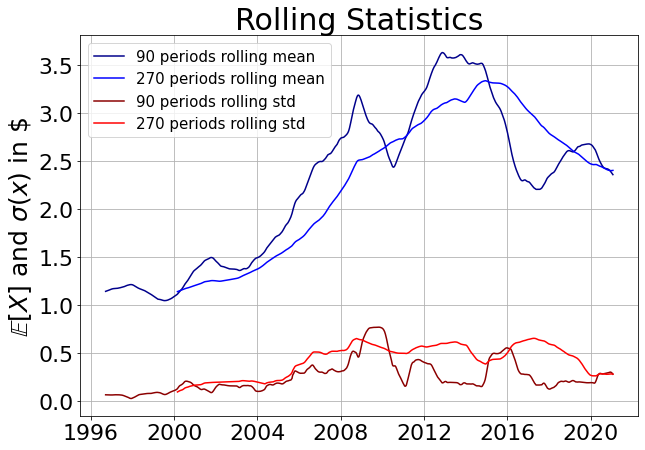

In [105]:
fig = plt.figure(figsize = (10, 7))
df_gasoline['R1'].rolling(90).mean().plot(color = 'darkblue', label = '90 periods rolling mean')
df_gasoline['R1'].rolling(270).mean().plot(color = 'blue', label = '270 periods rolling mean')
df_gasoline['R1'].rolling(90).std().plot(color = 'darkred', label = '90 periods rolling std')
df_gasoline['R1'].rolling(270).std().plot(color = 'red', label = '270 periods rolling std')
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 22)
plt.xlabel('')
plt.title('Rolling Statistics', fontsize = 30)
plt.ylabel('$\mathbb{E}[X]$ and $\sigma(x)$' + ' in \$', fontsize = 25)
plt.grid()
plt.show()

In [106]:
df_gasoline['R1_L90'] = df_gasoline['R1'].shift(90)

df_gasoline_slice = df_gasoline[['A1', 'R1_L90']].dropna()

In [107]:
specification = 'np.log(A1 + 1) ~ np.log(R1_L90 + 1)'

ols_reg = smf.ols(formula = specification, data = df_gasoline_slice).fit(cov_type = 'HC1')
print(ols_reg.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.617     
Dependent Variable: np.log(A1 + 1)   AIC:                -1066.9759
Date:               2021-02-20 19:15 BIC:                -1056.6808
No. Observations:   1271             Log-Likelihood:     535.49    
Df Model:           1                F-statistic:        2269.     
Df Residuals:       1269             Prob (F-statistic): 7.52e-285 
R-squared:          0.617            Scale:              0.025250  
-------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
Intercept              0.3553   0.0169 21.0338 0.0000 0.3222 0.3884
np.log(R1_L90 + 1)     0.7303   0.0153 47.6380 0.0000 0.7003 0.7604
-------------------------------------------------------------------
Omnibus:               14.996        Durbin-Watson:           0.01

С помощью мтеода `predict(X)` сделаем точечное предсказание. С помощью метода `get_prediction(X)` получим более обширные детали по предсказанию (однако без исходных индексов). Далее можно взять от объекта, созданного с помощью `get_prediction(X)` метод `.conf_int(..)`, который выдаст массив из нижней и верхней границ доверительного интервала.

Далее построим график с прогнозом и доверительным интервалом. Красным пометим фактическое значение.

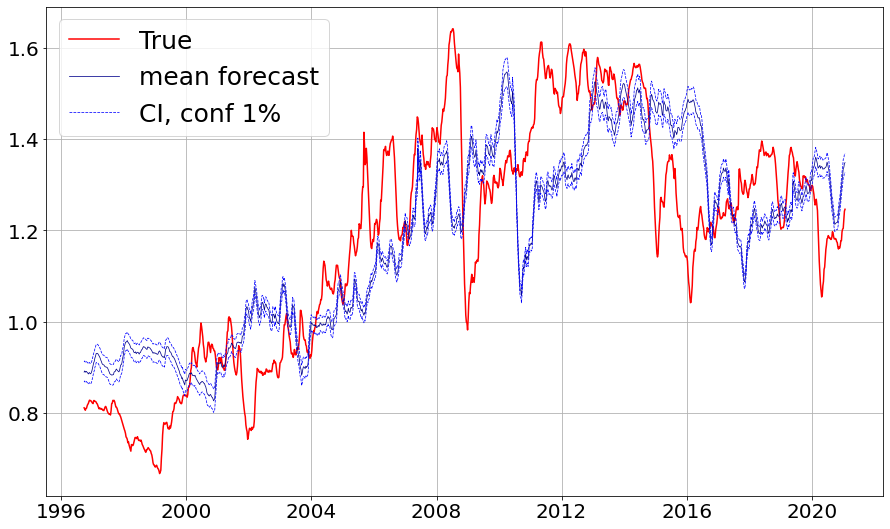

In [108]:
prediction_point = ols_reg.predict(df_gasoline_slice)

prediction_conf_low = ols_reg.get_prediction(df_gasoline_slice).conf_int(alpha = 0.001)[:, 0]
prediction_conf_up = ols_reg.get_prediction(df_gasoline_slice).conf_int(alpha = 0.001)[:, 1]

prediction_conf_up = pd.Series(prediction_conf_up, index = prediction_point.index)
prediction_conf_low = pd.Series(prediction_conf_low, index = prediction_point.index)

fig = plt.figure(figsize = (15, 9))

plt.plot(df_gasoline_slice['A1'].apply(lambda x: np.log(1 + x)), label = 'True', color = 'red')
plt.plot(prediction_point, label = 'mean forecast', color = 'darkblue', linewidth = 0.75)
plt.plot(prediction_conf_up, label = 'CI, conf 1%', color = 'blue', linestyle = 'dashed', linewidth = 0.75)
plt.plot(prediction_conf_low, color = 'blue', linestyle = 'dashed', linewidth = 0.75)
plt.legend(fontsize = 25)
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

В примере ниже можно увидеть способ вывода результирующей регрессионной таблички в latex. Вам требуется выбрать нужную Вам.

In [109]:
print(ols_reg.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}      &  np.log(A1 + 1)  & \textbf{  R-squared:         } &     0.617   \\
\textbf{Model:}              &       OLS        & \textbf{  Adj. R-squared:    } &     0.617   \\
\textbf{Method:}             &  Least Squares   & \textbf{  F-statistic:       } &     2269.   \\
\textbf{Date:}               & Sat, 20 Feb 2021 & \textbf{  Prob (F-statistic):} & 7.52e-285   \\
\textbf{Time:}               &     19:19:10     & \textbf{  Log-Likelihood:    } &    535.49   \\
\textbf{No. Observations:}   &        1271      & \textbf{  AIC:               } &    -1067.   \\
\textbf{Df Residuals:}       &        1269      & \textbf{  BIC:               } &    -1057.   \\
\textbf{Df Model:}           &           1      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                             & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & 

Можно посмотреть составные части-таблицы результирующей таблицы регрессии в `.summary().table` примененного к Вашей регрессии.

In [ ]:
for t in ols_reg.summary().tables:
    print(t.as_latex_tabular())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &  np.log(A1 + 1)  & \textbf{  R-squared:         } &     0.617  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.617  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     2269.  \\
\textbf{Date:}             & Sat, 20 Feb 2021 & \textbf{  Prob (F-statistic):} & 7.52e-285  \\
\textbf{Time:}             &     11:03:08     & \textbf{  Log-Likelihood:    } &    535.49  \\
\textbf{No. Observations:} &        1271      & \textbf{  AIC:               } &    -1067.  \\
\textbf{Df Residuals:}     &        1269      & \textbf{  BIC:               } &    -1057.  \\
\textbf{Df Model:}         &           1      & \textbf{                     } &            \\
\textbf{Covariance Type:}  &       HC1        & \textbf{                     } &            \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabu

Возьмем вторую табличку с коэффициентами и прочими моментами по переменным

In [ ]:
print(ols_reg.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                             & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}           &       0.3553  &        0.017     &    21.034  &         0.000        &        0.322    &        0.388     \\
\textbf{np.log(R1\_L90 + 1)} &       0.7303  &        0.015     &    47.638  &         0.000        &        0.700    &        0.760     \\
\bottomrule
\end{tabular}
\end{center}


Можно вывод сделать в latex с помощью пакета `stargazer`, установить который можно из jupyter notebook'a с помощью команды ниже `!pip install package_name`

In [110]:
!pip install stargazer

In [111]:
from stargazer.stargazer import Stargazer

In [113]:
stargazer_res = Stargazer([ols_reg])
stargazer_res

In [112]:
stargazer_res = Stargazer([ols_reg, ols_reg])
stargazer_res

In [114]:
print(stargazer_res.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 Intercept & 0.355$^{***}$ \\
  & (0.017) \\
 np.log(R1_L90 + 1) & 0.730$^{***}$ \\
  & (0.015) \\
\hline \\[-1.8ex]
 Observations & 1,271 \\
 $R^2$ & 0.617 \\
 Adjusted $R^2$ & 0.617 \\
 Residual Std. Error & 0.159(df = 1269)  \\
 F Statistic & 2269.379$^{***}$ (df = 1.0; 1269.0) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


А теперь посмотрим, как работают классификационные модели на примере логистической регрессии. Использовать будем данные по кредитным картам и дефолтам на них.

In [115]:
credits = pd.read_csv('/content/UCI_Credit_Card.csv').drop('ID', axis = 1)

In [116]:
credits.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Пол и статус замужества выделим как дамми-переменные через `C()`

In [117]:
specification = 'target ~ AGE + C(SEX) + C(MARRIAGE) + np.log(LIMIT_BAL) + PAY_0 + PAY_2 + PAY_AMT1 + PAY_AMT2'

logit_reg = smf.logit(formula = specification, data = credits).fit()
print(logit_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.466727
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.117     
Dependent Variable:  target           AIC:              28025.6145
Date:                2021-02-20 19:21 BIC:              28117.0130
No. Observations:    30000            Log-Likelihood:   -14002.   
Df Model:            10               LL-Null:          -15853.   
Df Residuals:        29989            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -0.3963   0.5509  -0.7194 0.4719 -1.4760  0.6834
C(SEX)[T.2]       -0.0931   0.0306  -3.0380 0.0024 -0

Также создадим пересечение переменных с помощью `*` как в примере ниже

In [118]:
specification = 'target ~  C(MARRIAGE) + AGE*C(SEX)  + np.log(LIMIT_BAL) + PAY_0 + PAY_2 + PAY_AMT1 + PAY_AMT2'

logit_reg = smf.logit(formula = specification, data = credits).fit()
print(logit_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.466717
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.117     
Dependent Variable:  target           AIC:              28027.0296
Date:                2021-02-20 19:22 BIC:              28126.7370
No. Observations:    30000            Log-Likelihood:   -14002.   
Df Model:            11               LL-Null:          -15853.   
Df Residuals:        29988            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -0.4403   0.5537  -0.7952 0.4265 -1.5255  0.6449
C(MARRIAGE)[T.1]   1.2850   0.5138   2.5009 0.0124  0

In [119]:
print(stargazer_res.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 Intercept & 0.355$^{***}$ \\
  & (0.017) \\
 np.log(R1_L90 + 1) & 0.730$^{***}$ \\
  & (0.015) \\
\hline \\[-1.8ex]
 Observations & 1,271 \\
 $R^2$ & 0.617 \\
 Adjusted $R^2$ & 0.617 \\
 Residual Std. Error & 0.159(df = 1269)  \\
 F Statistic & 2269.379$^{***}$ (df = 1.0; 1269.0) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


**План на следующее занятие**

* json/txt reading
* parsing websites
* optimization